# Welcome to the Consumer Data Centre workshop for the Festival of Social Science!

By working through this notebook and following along with the accompanying video you can find out more about what a data scientist might be doing on a day-to-day basis and start writing your very own code.

We’ll provide you with a large dataset of newspaper headlines from around the world and have the chance to find out how the use of words differs. By following a typical data science project life-cycle we’ll work through the process of gaining insights from data.


# What does this process look like?


When conducting data science we can broadly break this down into a few key areas;

 - Data Collection
 - Data Processing
 - Data Analysis
 - Data Visualisation and Dissemination

We already have the data so we’ll be focussing on the other steps today.


# About This Notebook

This interactive document you’re looking at is a called a Jupyter Notebook. Notebooks like this one are used a lot in Universities and Academia as a learning resource. 

Notebooks allow us to wrap up all the data, code and ‘packages’ (tools that can complete different tasks) in one place to make sharing our work easier so each person doesn’t have to individually download everything.

#### Important notice: As this is a remote document if you are inactive for more than 10 minutes it may cause an error that disconnects from the server.

#### If this happens please close the page and re-nter through the link.


# Running the Code

All the code you need to use today is contained in the grey cells in this document. There are a few simple ways to make sure the code has worked:

 - To run a cell of code, you can select a cell by clicking on it, then click the “Run” button on the tool bar at the top of the page OR you can press the Ctrl and Enter keys together.
 - Once you have done this and the code has finished (this may take a few seconds depending on the task) the result will appear below the cell.

Try running the code below to see what happens.


In [ ]:
print("Hello World!")
print(17 + 6)

You should see that it has printed the phrase “Hello World!” and calculated a sum at the same time.

# What is Python?


Python is the name of the programming language we’ll be using in this workshop. It is a very popular coding language and used by researchers and businesses and is an in demand skill in the world of data science.

Don’t worry about understanding every piece of code you see today, especially if it’s your first time. Our goal is simply to give you an idea what a data scientist may be doing and how you might use code to analyse data. 

We will point you in the direction of more educational content at the end of this workshop but it would be useful to quickly introduce a few things at this stage;
 - Variables – Today we will be working with objects called variables. We can name variables ourselves to reflect what they area. They might be numbers, a string of text or even bits of our data which we will see later.
 - Comments (#) – every time you see a ‘#’ in a cell of code this means it iss a comment that will not effect the result. These are notes we can leave for ourselves to remind us what is happening.

The cell below has an example of variables and comments. See if you can edit the code and see how the results change if you run the code again.


In [1]:
# This cell has examples of variable assignment
# (Notice how this line starts with '#' so it is a comment ignored by the code.)

# vvv Try editing this code!
my_name = "Waldo" 
breakfast_food = "eggs"
fav_number = 17
# ^^^ Try editing this code!

print("Hello! My name is " + my_name + ".")
print("Today I had " + breakfast_food + " for breakfast.")
print(str(fav_number) + " is my favourite number.")
print("Twice my favourite number would be: " + str(fav_number * 2))

Hello! My name is Waldo.
Today I had eggs for breakfast.
17 is my favourite number.
Twice my favourite number would be: 34


# Getting Setup

Next we’ll start working with real data and get started with our analysis.

Before we can do that we first need to load the packages and libraries we will use. These packages and libraries contain different tools we are going to use on our data. 

This is an important to step to make sure the rest of our code works – but don’t worry too much about this step.

In [2]:
# Importing useful Python modules

print("About to import Python modules...")
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
print("Finished importing Python modules")


About to import Python modules...
Finished importing Python modules


Next we’ll load in our data. The data we are using today is publicly available and contains over 400,000 news headlines from around the world that was collected in 2014.


In [4]:
# This code will load in our data set.

# This is the name of the file, which is a csv file that has been compressed as a zip file.
data_file_name = "uci-news-aggregator-short.zip"

# Here we read file.
news_df = pd.read_csv(data_file_name)

# We're only going to look at titles and publishers.
news_df = news_df.loc[:, ['TITLE','PUBLISHER']]

#Let us know when the task is finished
print("Finished reading the data.")

Finished reading the data.


The data set is now stored in the variable named `news_df`. This variable contains an entire table of data!

Lets see what our data looks like:

In [5]:
# See what the table of data looks like:
print(news_df)

                                                    TITLE          PUBLISHER
0       Fed official says weak data caused by weather,...  Los Angeles Times
1       Fed's Charles Plosser sees high bar for change...           Livemint
2       US open: Stocks fall after Fed official hints ...       IFA Magazine
3       Fed risks falling 'behind the curve', Charles ...       IFA Magazine
4       Fed's Plosser: Nasty Weather Has Curbed Job Gr...          Moneynews
...                                                   ...                ...
422414  Surgeons to remove 4-year-old's rib to rebuild...            WSHM-TV
422415  Boy to have surgery on esophagus after battery...    WLWT Cincinnati
422416  Child who swallowed battery to have reconstruc...       NewsNet5.com
422417  Phoenix boy undergoes surgery to repair throat...               WFSB
422418  Phoenix boy undergoes surgery to repair throat...            WSHM-TV

[422419 rows x 2 columns]


The dataset is too large, so the notebook won't show us everything. It shows us the first 5 and last 5 nows in our data and tells us that we have 422,419 rows in total.

Just from this quick look at the data, we see that this table has 3 columns:
- a numbered label (also called the **index**) for each row
- `TITLE`, containing the headline
- `PUBLISHER`, who the headline was printed by


# Examining Publishers

It would be useful to learn more about what is in our data. Let's look at how many different publishers there are in the `PUBLISHER` column.

In [7]:
# Look at the number of headlines per publisher in our data set:

publisher_counts = news_df['PUBLISHER'].value_counts()
print(publisher_counts)

Reuters                            3902
Huffington Post                    2455
Businessweek                       2395
Contactmusic.com                   2334
Daily Mail                         2254
                                   ... 
Broadway Blog \(blog\)                1
Breckenridge American                 1
SanFranciscoSentinel.com              1
Wicked Local North Attleborough       1
Journeyman Weekly                     1
Name: PUBLISHER, Length: 10985, dtype: int64


Again, this table is too large to easily print everything, but at a glance we can see that the publisher with the most headlines in this data set is Reuters, followed by Huffington Post and Businessweek.

`Length: 10985` also shows us there are 10,985 publishers in this data set.

We saved this table of publisher counts in the variable named `publisher_counts`, so we can use it in the next cell's code to see how many records appear with a given publisher. 

You can change the value of `publisher_to_check` to the name of any other news source you think might appear in this data set. 

(Note: Python often makes use of indented code. If you edit the code we've written below, do not alter the indents at the start of lines. If you do, the code might not work correctly.)

In [8]:
# Look at how many headlines in this data set are from a given publisher.

# vvv Try editing this code!
publisher_to_check = "Yorkshire Post"
# ^^^ Try editing this code!

if publisher_to_check in publisher_counts:
    print(publisher_counts[publisher_to_check])
else:
    print("That name doesn't appear in the list of publishers.")

99


# Examining Words in Headlines

Now let's look at the headlines. Let's say we're interested in looking at the set of words in a headline. Here's a convenient method for splitting up a string of text into a list of words, separating it on all its spaces:

In [9]:
# Splitting a string of text into separate words

example_sentence = "This example sentence contains six words."
example_word_list = example_sentence.split()
print(example_sentence)
print(example_word_list)

This example sentence contains six words.
['This', 'example', 'sentence', 'contains', 'six', 'words.']


We'll apply this to every headline in the `TITLE` column, and store all the results in a new column we'll call `WORDS`.

In [10]:
# Adding a new WORDS column to our table

news_df['WORDS'] = [headline.split() for headline in news_df['TITLE']]
print(news_df)

                                                    TITLE          PUBLISHER  \
0       Fed official says weak data caused by weather,...  Los Angeles Times   
1       Fed's Charles Plosser sees high bar for change...           Livemint   
2       US open: Stocks fall after Fed official hints ...       IFA Magazine   
3       Fed risks falling 'behind the curve', Charles ...       IFA Magazine   
4       Fed's Plosser: Nasty Weather Has Curbed Job Gr...          Moneynews   
...                                                   ...                ...   
422414  Surgeons to remove 4-year-old's rib to rebuild...            WSHM-TV   
422415  Boy to have surgery on esophagus after battery...    WLWT Cincinnati   
422416  Child who swallowed battery to have reconstruc...       NewsNet5.com   
422417  Phoenix boy undergoes surgery to repair throat...               WFSB   
422418  Phoenix boy undergoes surgery to repair throat...            WSHM-TV   

                                       

Here's some code that will show us how many headlines contain a given word, and shows the first few examples:

In [11]:
# Counting the number of headlines with a chosen word

# vvv Try editing this code!
word_to_check = "Sport"
# ^^^ Try editing this code!

news_words_df = news_df.explode("WORDS")
word_appearances = news_words_df.loc[news_words_df['WORDS']==word_to_check]
num_appearances = len(word_appearances)
print("Number of appearances of \"" + word_to_check + "\": " + str(num_appearances))
print("Examples of appearances (maximum 10):")
print(word_appearances.iloc[:10,[0,1]].to_string(index=False))

Number of appearances of "Sport": 47
Examples of appearances (maximum 10):
                                                                           TITLE                       PUBLISHER
                                   Sport Relief: Kingscourt School, Catherington                 Portsmouth News
                                             Sport Relief: Portsmouth University                 Portsmouth News
                     Google Nexus 6 to Sport Same Features as LG G3 Leaked Specs International Business Times AU
                                       Moto 360 Rumoured To Sport Sapphire Glass                    Techtree.com
  Remembering Hobie Alter, the Surfing Visionary Who Invented a Sport and a  ...                    Entrepreneur
             Samsung Galaxy Note 4 Features Leaked: New Note to Sport 2K Display International Business Times UK
Peaches Geldof's final TV appearance for Sport Relief just weeks before her  ...                    Mirror.co.uk
                  Mot

In the code above, you can change the value of `word_to_check` to be any word you'd like to search for. Try it yourself!

# Normalising Words

After you've tried searching some words, go back and check how many times the word "Sport" appears. Now try checking "sport" in all lowercase instead -- you'll get a different output!

Currently, the code would treat the same word with a capital letter as different, but that's not really what we want. When we're checking how frequently a word is used, we want it to count every version.

Also, try checking "Sport," with a comma after it -- that's treated differently too. So we should rewrite our code to ignore punctuation and capital letters. 

That's what the code in the next cell does, saving the normalised words by overwriting the `WORDS` column.

In [12]:
# Removing all punctuation and converting all words to lowercase

nopunct_pattern = re.compile('[^a-zA-Z0-9 ]+')
news_df['WORDS'] = [set(nopunct_pattern.sub('', headline.lower()).split()) for headline in news_df['TITLE']]
print(news_df)

                                                    TITLE          PUBLISHER  \
0       Fed official says weak data caused by weather,...  Los Angeles Times   
1       Fed's Charles Plosser sees high bar for change...           Livemint   
2       US open: Stocks fall after Fed official hints ...       IFA Magazine   
3       Fed risks falling 'behind the curve', Charles ...       IFA Magazine   
4       Fed's Plosser: Nasty Weather Has Curbed Job Gr...          Moneynews   
...                                                   ...                ...   
422414  Surgeons to remove 4-year-old's rib to rebuild...            WSHM-TV   
422415  Boy to have surgery on esophagus after battery...    WLWT Cincinnati   
422416  Child who swallowed battery to have reconstruc...       NewsNet5.com   
422417  Phoenix boy undergoes surgery to repair throat...               WFSB   
422418  Phoenix boy undergoes surgery to repair throat...            WSHM-TV   

                                       

Now when we search for words, the headlines with all possible capitalisations will be included. 

Try your searches again in this next cell of code. Again, feel free to change `word_to_check` to any word you'd like.

In [13]:
# Counting the number of headlines with a chosen word (now with normalised words)

# vvv Try editing this code!
word_to_check = "sport"
# ^^^ Try editing this code!

word_to_check = word_to_check.lower() # Force lowercase
news_words_df = news_df.explode("WORDS")
word_appearances = news_words_df.loc[news_words_df['WORDS']==word_to_check]
num_appearances = len(word_appearances)
print("Number of appearances of \"" + word_to_check + "\": " + str(num_appearances))
print("Examples of appearances (maximum 10):")
print(word_appearances.iloc[:10,[0,1]].to_string(index=False))

Number of appearances of "sport": 69
Examples of appearances (maximum 10):
                                                                           TITLE                        PUBLISHER
                                   Sport Relief: Kingscourt School, Catherington                  Portsmouth News
                                             Sport Relief: Portsmouth University                  Portsmouth News
                     Google Nexus 6 to Sport Same Features as LG G3 Leaked Specs  International Business Times AU
                                        Breast cancer risk walks away with sport West - Welfare Society Territory
                                       Moto 360 Rumoured To Sport Sapphire Glass                     Techtree.com
Your iPhone can no longer sport BlackBerry's Qwerty keyboard. Click here to  ...                   Emirates 24\/7
                           Mark Wahlberg a good sport at the Kids' Choice Awards                     Boston Globe
  Remembering

# Exploring word frequency

Next, let's compare how frequently certain words appear in headlines from different news sources. First let's take a look through the 30 publishers with the most headlines in our data set.

In [14]:
# View 30 most common publishers in the data set
print(publisher_counts[:30])

Reuters                            3902
Huffington Post                    2455
Businessweek                       2395
Contactmusic.com                   2334
Daily Mail                         2254
NASDAQ                             2228
Examiner.com                       2085
Los Angeles Times                  1976
GlobalPost                         1975
RTT News                           1798
TheCelebrityCafe.com               1699
Entertainmentwise                  1600
Forbes                             1550
Bloomberg                          1495
MarketWatch                        1460
TIME                               1436
New York Daily News                1428
PerezHilton.com                    1427
Headlines \& Global News           1417
CBS Local                          1388
Times of India                     1366
Telegraph.co.uk                    1365
USA TODAY                          1315
Wetpaint                           1295
Wall Street Journal                1287


From this list, we'll choose just a few to represent the UK and the US, in the code below.

If you like, you could change these lists to your own choices of publishers, but make sure you write the publisher's names exactly as they appear in the data.

In [15]:
# Declare lists of UK and US publishers that we'd like to examine

# vvv Try editing this code!
uk_publisher_list = ["Daily Mail", "Telegraph.co.uk", "The Guardian"]
us_publisher_list = ["Los Angeles Times", "USA TODAY", "CBS Local"]
# ^^^ Try editing this code!

print(publisher_counts[uk_publisher_list])
print("Total for these publishers:")
print(sum(publisher_counts[uk_publisher_list]))
print()
print(publisher_counts[us_publisher_list])
print("Total for these publishers:")
print(sum(publisher_counts[us_publisher_list]))

Daily Mail         2254
Telegraph.co.uk    1365
The Guardian       1244
Name: PUBLISHER, dtype: int64
Total for these publishers:
4863

Los Angeles Times    1976
USA TODAY            1315
CBS Local            1388
Name: PUBLISHER, dtype: int64
Total for these publishers:
4679


Let's compare how many times the word "the" appears in these sources. You can also try replacing "the" with any other word you'd like to check.

In [16]:
# Counting instances of a certain word in headlines from selected publishers

# vvv Try editing this code!
word_to_check = "the"
# ^^^ Try editing this code!

word_to_check = word_to_check.lower() # Force lowercase
news_words_df = news_df.explode("WORDS")
word_appearances = news_words_df.loc[news_words_df['WORDS']==word_to_check].drop(['WORDS'], axis=1)

word_appearances_uk = word_appearances[word_appearances["PUBLISHER"].isin(uk_publisher_list)]
word_appearances_us = word_appearances[word_appearances["PUBLISHER"].isin(us_publisher_list)]

total_uk_count = len(news_df[news_df["PUBLISHER"].isin(uk_publisher_list)])
total_us_count = len(news_df[news_df["PUBLISHER"].isin(us_publisher_list)])

print("Number of UK headlines with \"" + word_to_check + "\": " + str(len(word_appearances_uk)) )
print("Total UK headlines: " + str(total_uk_count))
print("Proportion: " + str(len(word_appearances_uk)/total_uk_count))
print()
print("Number of US headlines with \"" + word_to_check + "\": " + str(len(word_appearances_us)) )
print("Total US headlines: " + str(total_us_count))
print("Proportion: " + str(len(word_appearances_us)/total_us_count))
print()
print(word_appearances_uk)
print(word_appearances_us)


Number of UK headlines with "the": 968
Total UK headlines: 4863
Proportion: 0.19905408184248408

Number of US headlines with "the": 542
Total US headlines: 4679
Proportion: 0.11583671724727505

                                                    TITLE        PUBLISHER
536     All out of dough: Sbarro Pizza files for bankr...       Daily Mail
971     Titanfall takes aim at the cloud: 'We've reall...     The Guardian
1367    Google's Sundar Pichai on wearable tech: 'We'r...     The Guardian
2722    Bachelor star Juan Pablo Galavis blames poor E...       Daily Mail
3199    Lena Dunham and Jack Antonoff pictured on 'dou...       Daily Mail
...                                                   ...              ...
421019    BLOGS OF THE DAY: Bond Brosnan is back as a spy       Daily Mail
421186         Why I turned down the Ice Bucket Challenge  Telegraph.co.uk
421190  Ice-bucket challenge: 40 of the best videos so...  Telegraph.co.uk
421987  Pandering to the crowd: panda accused of fakin..

Let's try to find which words appear in the most UK headlines and US headlines. You can change the value of the `top_words_number` to choose how many words you'd like to display, instead of only the top ten.

In [18]:
# Most common words in headlines from our selected publishers

# vvv Try editing this code!
top_words_number = 10
# ^^^ Try editing this code!

uk_words_df = news_words_df[news_words_df["PUBLISHER"].isin(uk_publisher_list)]
uk_word_counts = uk_words_df['WORDS'].value_counts()
print(str(top_words_number) + " most common words from selected UK publishers:")
print(uk_word_counts[:top_words_number])
print()
us_words_df = news_words_df[news_words_df["PUBLISHER"].isin(us_publisher_list)]
us_word_counts = us_words_df['WORDS'].value_counts()
print(str(top_words_number) + " most common words from selected US publishers:")
print(us_word_counts[:top_words_number])


10 most common words from selected UK publishers:
to      1201
the      968
in       952
of       864
and      748
for      595
a        542
as       498
on       472
with     393
Name: WORDS, dtype: int64

10 most common words from selected US publishers:
to      1002
in       774
of       655
for      590
the      542
on       438
a        339
and      314
with     288
at       286
Name: WORDS, dtype: int64


Many of these words aren't very interesting: to, the, in, of, and so on. 

Let's consult a list of these common words (also called "stop words"), and ignore anything on that list when counting the most frequent words in the headlines.

In [19]:
# Most common words in headlines from our selected publishers, ignoring stop words

# vvv Try editing this code!
top_words_number = 10
# ^^^ Try editing this code!

stopwords_list = [nopunct_pattern.sub('', sw.lower()) for sw in STOPWORDS]
uk_goodwords_df = uk_words_df[~uk_words_df['WORDS'].isin(stopwords_list)]
uk_goodword_counts = uk_goodwords_df['WORDS'].value_counts()
us_goodwords_df = us_words_df[~us_words_df['WORDS'].isin(stopwords_list)]
us_goodword_counts = us_goodwords_df['WORDS'].value_counts()

print(str(top_words_number) + " most common words from selected UK publishers:")
print(uk_goodword_counts[:top_words_number])
print()
print(str(top_words_number) + " most common words from selected US publishers:")
print(us_goodword_counts[:top_words_number])


10 most common words from selected UK publishers:
new           277
us            182
kardashian    178
kim           164
google        128
will          118
first         117
says          109
star          102
review        100
Name: WORDS, dtype: int64

10 most common words from selected US publishers:
new       277
says      124
us        119
study     110
first      98
may        91
video      87
report     86
google     84
will       83
Name: WORDS, dtype: int64


# Bar Charts

We can create bar charts showing some of the most common words in a group of publishers. Again, you can choose how many words we display in our chart by changing the value of the `top_words_number` variable.

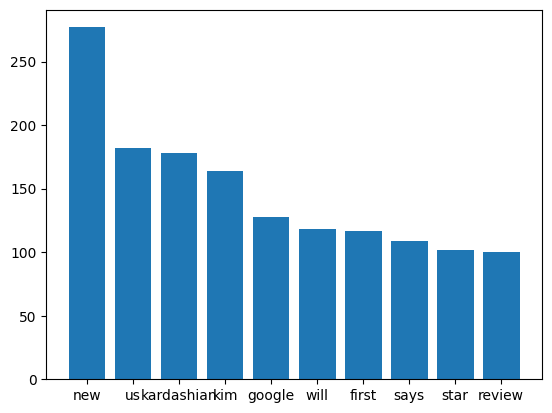

In [20]:
# Bar chart of UK data

# This value is the number of most frequent words we'll include in our chart:
# vvv Try editing this code!
top_words_number = 10
# ^^^ Try editing this code!

word_counts_to_graph = uk_goodword_counts

top_words_data = word_counts_to_graph[:top_words_number]
fig, ax = plt.subplots()
ax.bar(top_words_data.index, top_words_data.values)
plt.show()


The word labels run too closely together along the bottom of that chart, so let's try a horizontal bar chart instead.

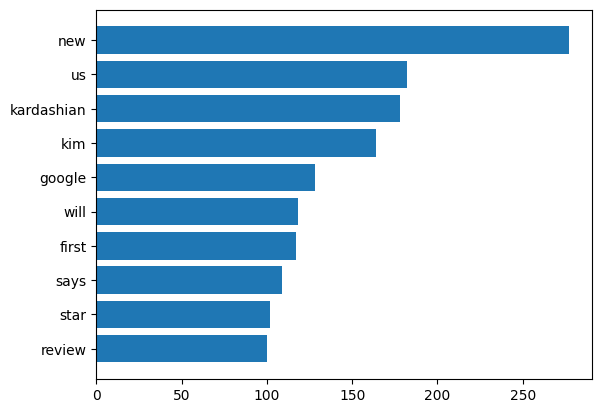

In [21]:
# Horizontal bar chart

# This value is the number of most frequent words we'll include in our chart:
# vvv Try editing this code!
top_words_number = 10
# ^^^ Try editing this code!

word_counts_to_graph = uk_goodword_counts
top_words_data = word_counts_to_graph[:top_words_number]
fig, ax = plt.subplots()
ax.barh(top_words_data.index[::-1], top_words_data.values[::-1])
plt.show()


There are several extra features that we can add to charts like this. Let's add a title for the chart, change the colour of the bars from the default blue, and add display the size of each bar as a label on the bar itself.

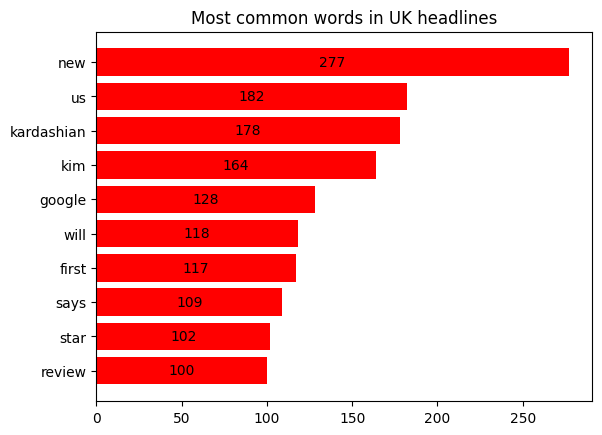

In [22]:
# Adding extra features

# vvv Try editing this code!

# This value is the number of most frequent words we'll include in our chart:
top_words_number = 10
# This value is the colour of the bars:
bar_colour = "red"
# This value will be the title that appears at the top:
chart_title = "Most common words in UK headlines"

# ^^^ Try editing this code!


word_counts_to_graph = uk_goodword_counts

top_words_data = word_counts_to_graph[:top_words_number]
fig, ax = plt.subplots()
bars = ax.barh(top_words_data.index[::-1], top_words_data.values[::-1], color=bar_colour)
ax.bar_label(bars, label_type='center')
ax.set_title(chart_title)
plt.show()


# Word Clouds

We can also make word clouds that show the most common words in our data.

The algorithm for creating these word clouds has an element of randomness, so you can run the code multiple times to generate a slightly different-looking word cloud each time.

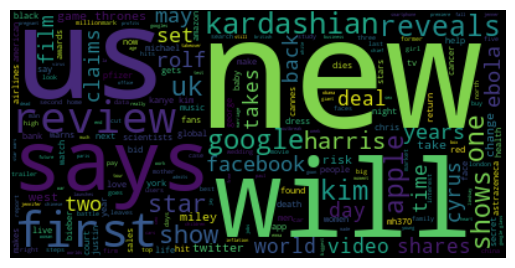

In [23]:
# Word cloud for UK headlines

text_for_cloud = " ".join(uk_goodwords_df['WORDS'].tolist())
wcloud = WordCloud(normalize_plurals=False).generate(text_for_cloud)
plt.figure()
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

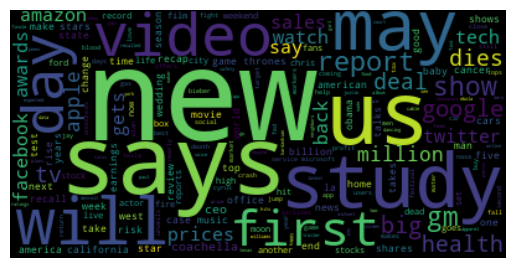

In [24]:
# Word cloud for US headlines

text_for_cloud = " ".join(us_goodwords_df['WORDS'].tolist())
wcloud = WordCloud(normalize_plurals=False).generate(text_for_cloud)
plt.figure()
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Closing Comments

(Any parting thoughts)